In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib

In [21]:
def Clean_data():
    df=pd.read_csv(r'C:\Users\newma\OneDrive\Desktop\cardio_train.csv',sep=';',nrows = 200)
    df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,
            inplace=True)
    df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,
            inplace=True)
    df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,
            inplace=True)
    df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,
            inplace=True)
    #df.drop(df['id'])
    df = df[['id','ap_hi', 'ap_lo', 'cardio']]
    
    return df

data = Clean_data()

#print(data)

In [22]:
#Setting the max distance to 20
Max_dis = 20
rows = data.shape[0]
def Mahan_dis(data):
    density = [0] * rows
    # data['density'] = a
    for i in range(rows):
        point1 = data.iloc[i]
        for j in range(rows):
            if i != j:
                point2 = data.iloc[j]
                dis = abs(point1[1] - point2[1]) + abs(point1[2] - point2[2])
                if dis - Max_dis < 0:
                    density[i] = density[i] + 1

    data['density'] = density

    return data

data = Mahan_dis(data)
#print(data)

In [23]:
#Link the point to its cloest point with higher density
def Min_distance(data):
    #Initiliza some number that cannot happen in the dataset
    connected_id = [1000] * rows
    dis_ini = [1000] * rows

    # data['density'] = a
    for i in range(rows):
        for j in range(rows):
            if i != j:
                if data.iloc[i][4] < data.iloc[j][4]:
                    dis = abs(data.iloc[i][1] - data.iloc[j][1]) + abs(data.iloc[i][2] - data.iloc[j][2])
                    if dis < dis_ini[i]:
                        dis_ini[i] = dis
                        connected_id[i] = data.iloc[j][0]

    #Looking for the max distance
    max_dis = 0
    for a in range(rows):
        if connected_id[a] == 1000:
            connected_id[a] = data.iloc[a][0]
            for b in range(rows):
                dis = abs(data.iloc[a][1] - data.iloc[b][1]) + abs(data.iloc[a][2] - data.iloc[b][2])
                if dis > max_dis:
                    max_dis = dis
            dis_ini[a] = max_dis


    data['connected_id'] = connected_id
    data['distance_con'] = dis_ini
    #print(connected_id)

    return data
data = Min_distance(data)
#print(data)

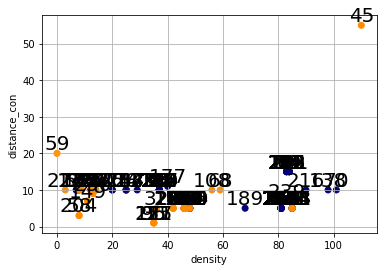

In [24]:
colors = ['navy', 'darkorange']
def Plot_p(dataset):
    X = dataset['density']

    y = dataset['distance_con']
    ids = dataset['id']

    # y = y.drop([194])

    # print(y)
    # labels = dataset['Predict_Class']
    labels = dataset['cardio']
    # plt.titple("MLP Classifier")

    # plt.plot(X, y, 'ro', label='Train Precision')

    plt.scatter(X, y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
    # plt.plot(epochs, val_pre, 'b', label="Test Precision")
    plt.xlabel('density')
    plt.ylabel('distance_con')
    for a, b, i in zip(X, y, ids):
        plt.text(a, b, i, ha='center', va='bottom', fontsize=20)

    plt.grid(True)
    # plt.legend(loc='best', shadow=False, scatterpoints=1)
    # plt.legend()
    plt.show()

Plot_p(data)

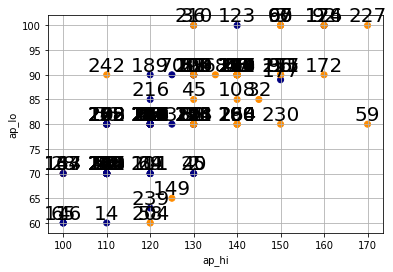

In [25]:
def Plot_Data(dataset):
    X = dataset['ap_hi']

    y = dataset['ap_lo']
    # y = y.drop([194])
    ids = dataset['id']
    # print(y)
    # labels = dataset['Predict_Class']
    labels = dataset['cardio']
    # plt.titple("MLP Classifier")

    # plt.plot(X, y, 'ro', label='Train Precision')

    plt.scatter(X, y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
    # plt.plot(epochs, val_pre, 'b', label="Test Precision")
    plt.xlabel('ap_hi')
    plt.ylabel('ap_lo')

    for a, b, i in zip(X, y, ids):
        plt.text(a, b, i, ha='center', va='bottom', fontsize=20)

    plt.grid(True)
    # plt.legend(loc='best', shadow=False, scatterpoints=1)
    # plt.legend()
    plt.show()
Plot_Data(data)